### 2. Análisis Preliminar / Visualización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Cargar los datos filtrados del primer notebook
df_filtrado = pd.read_csv('df_filtrado.csv')  # Importamos el csv

In [3]:
reservas_semanales = pd.read_csv('reservas_semanales.csv')  # Importamos el csv reservas

In [4]:
cancelaciones_semanales = pd.read_csv('cancelaciones_semanales.csv')  # Importamos el cancelaciones

In [5]:
# Configurar 'Fecha' como el índice
reservas_semanales.set_index('Fecha', inplace=True)
cancelaciones_semanales.set_index('Fecha', inplace=True)

In [6]:
#Graficar las reservas y cancelaciones

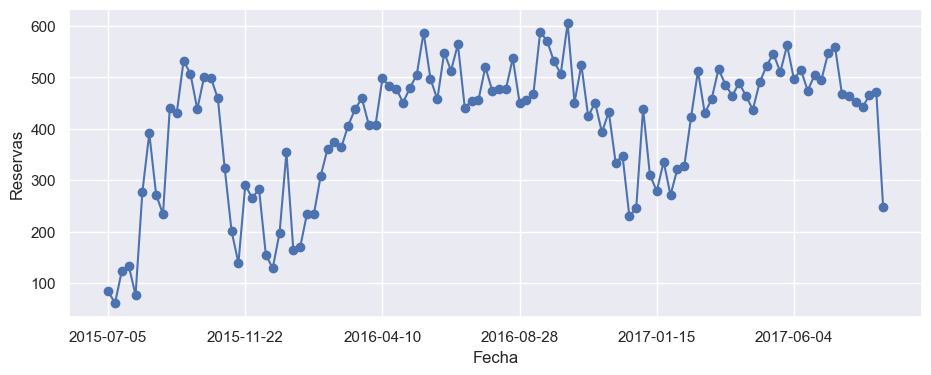

In [12]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
ax = reservas_semanales['Reservas'].plot(marker='o', linestyle='-')
ax.set_ylabel('Reservas');

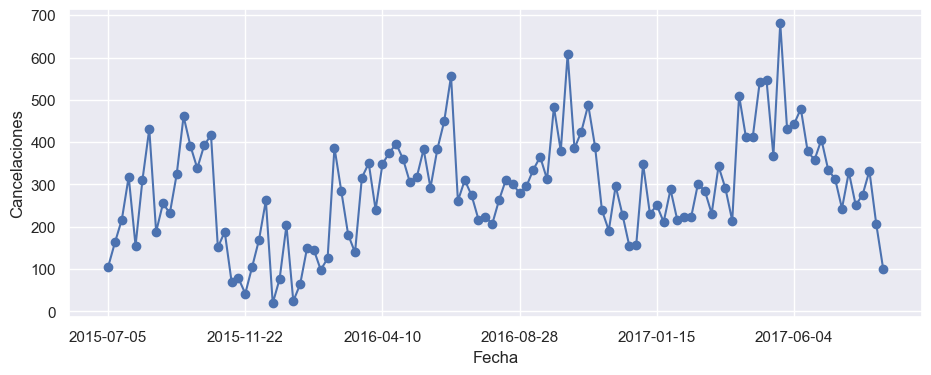

In [13]:
sns.set(rc={'figure.figsize':(11, 4)})
ax = cancelaciones_semanales['Cancelaciones'].plot(marker='o', linestyle='-')
ax.set_ylabel('Cancelaciones');

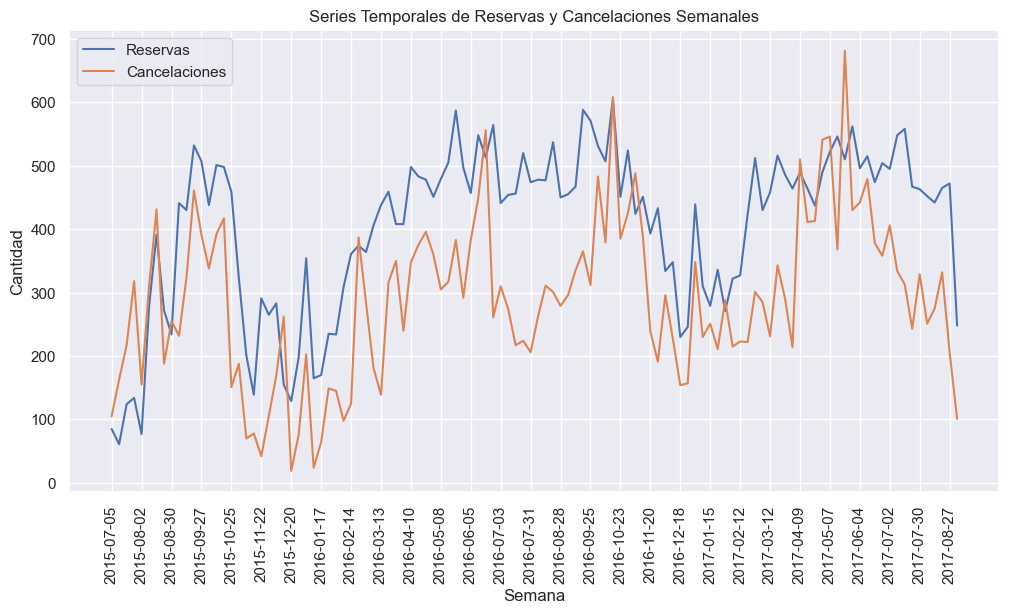

In [14]:
# Visualizar series temporales de reservas y cancelaciones
plt.figure(figsize=(12, 6))
plt.plot(reservas_semanales.index, reservas_semanales['Reservas'], label='Reservas')
plt.plot(cancelaciones_semanales.index, cancelaciones_semanales['Cancelaciones'], label='Cancelaciones')
plt.title('Series Temporales de Reservas y Cancelaciones Semanales')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.xticks(reservas_semanales.index[::4], rotation='vertical')
plt.legend()
plt.show()

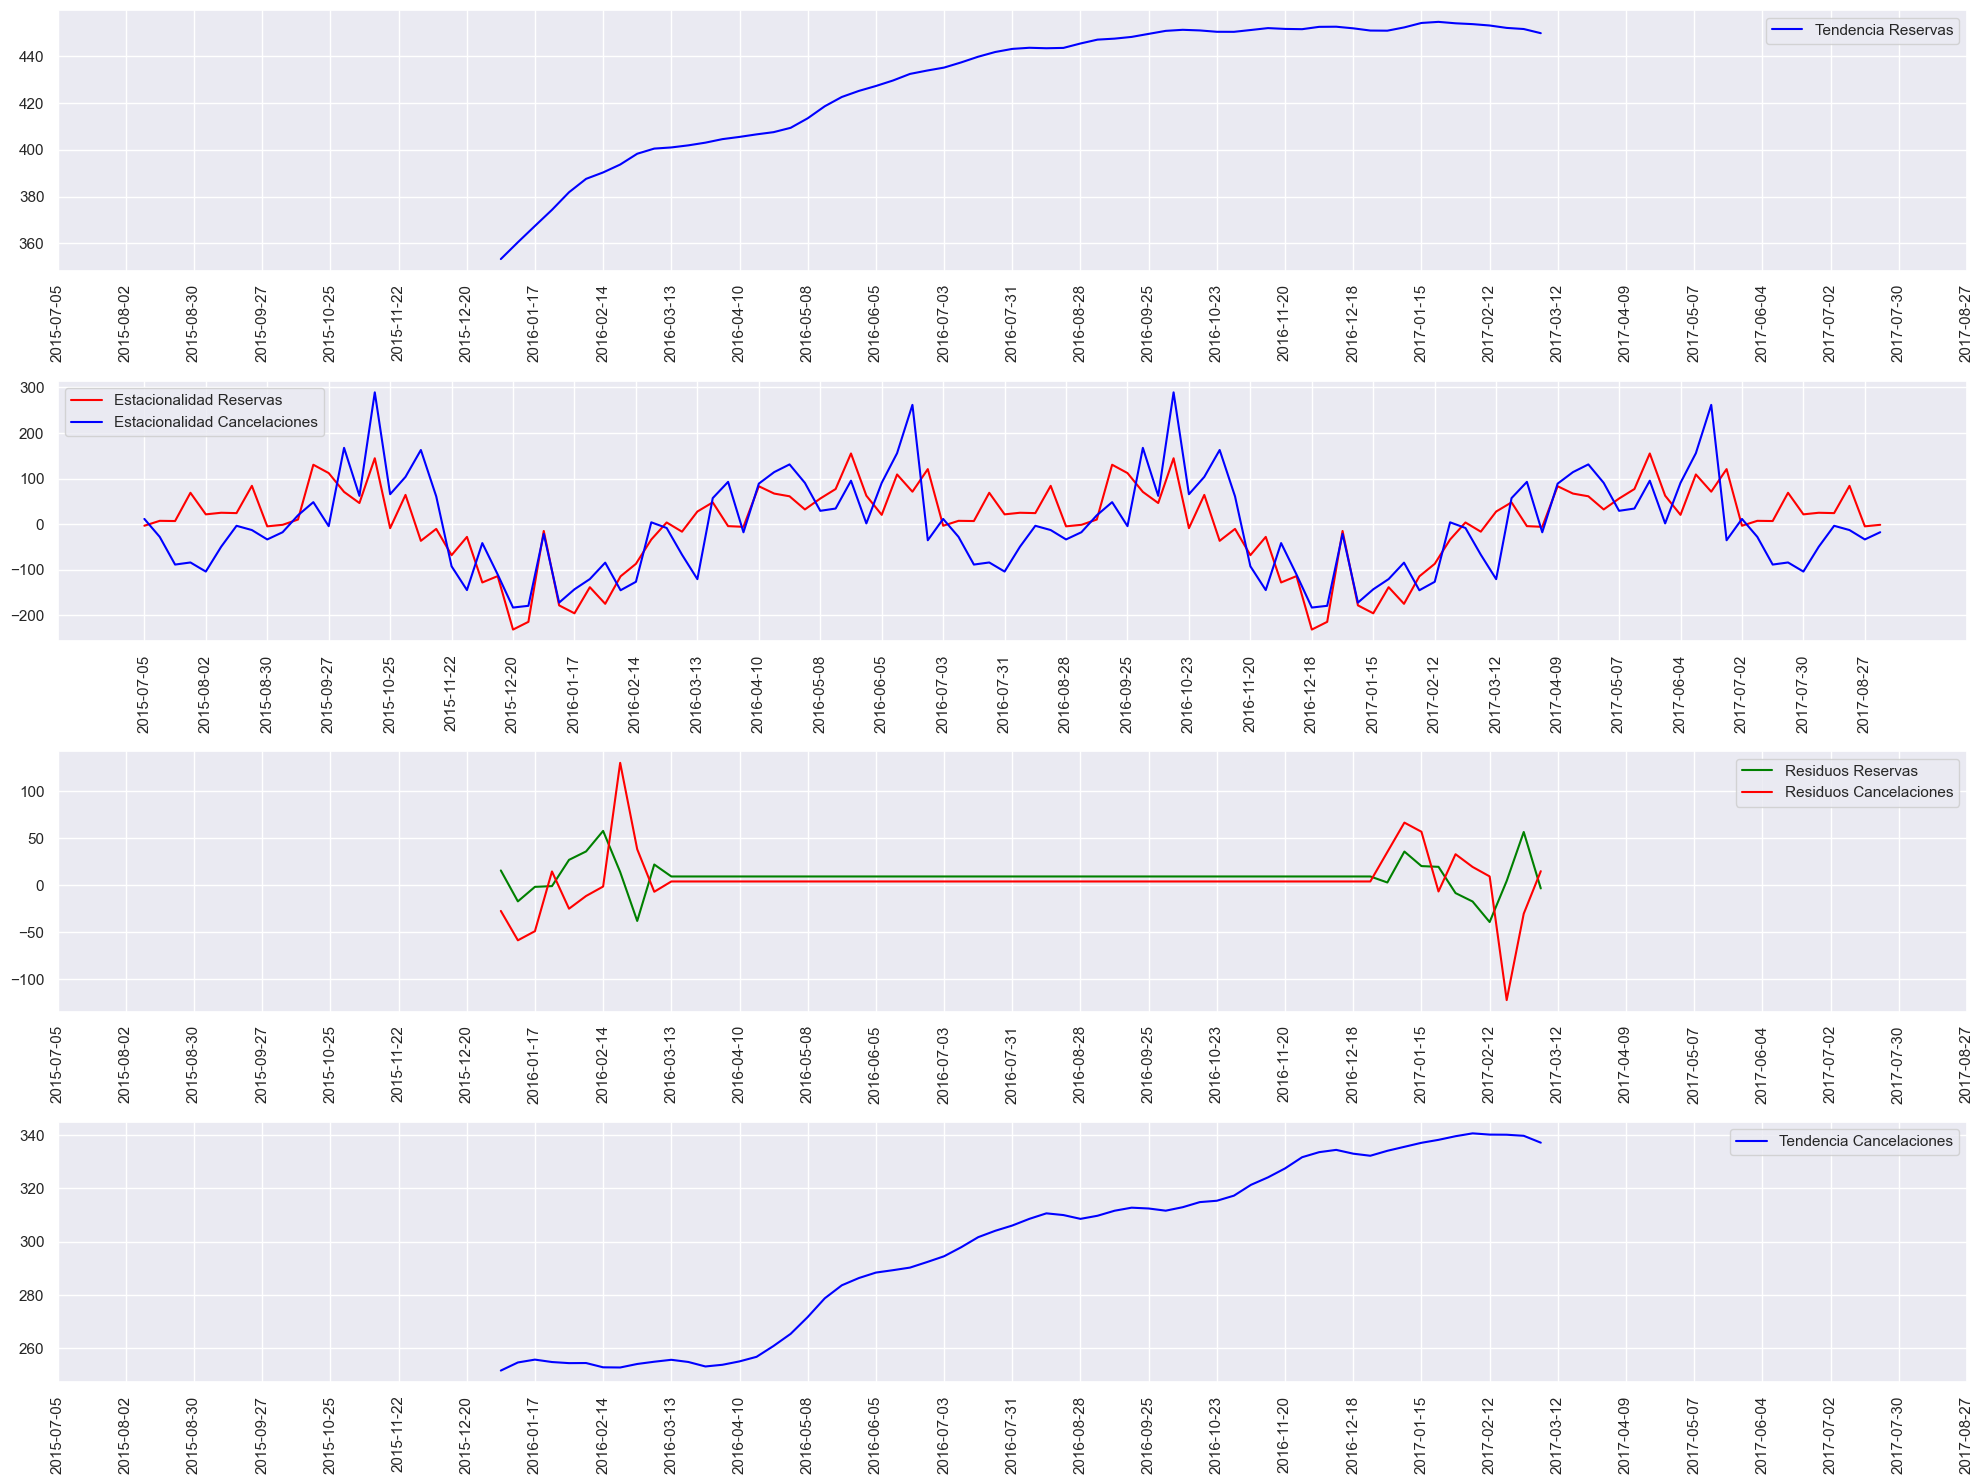

In [17]:
# Descomposición estacional
result_reservas = seasonal_decompose(reservas_semanales['Reservas'], model='additive', period=52)
result_cancelaciones = seasonal_decompose(cancelaciones_semanales['Cancelaciones'], model='additive', period=52)

# Graficar descomposición
plt.figure(figsize=(20, 15))

plt.subplot(4, 1, 1)
plt.plot(result_reservas.trend, label='Tendencia Reservas', color='blue')
plt.legend()

plt.xticks(result_reservas.trend.index[::4], rotation='vertical')

plt.subplot(4, 1, 2)
plt.plot(result_reservas.seasonal, label='Estacionalidad Reservas', color='red')
plt.legend()

plt.xticks(result_reservas.seasonal.index[::4], rotation='vertical')

plt.subplot(4, 1, 3)
plt.plot(result_reservas.resid, label='Residuos Reservas', color='green')
plt.legend()

plt.xticks(result_reservas.resid.index[::4], rotation='vertical')

plt.subplot(4, 1, 4)
plt.plot(result_cancelaciones.trend, label='Tendencia Cancelaciones', color='blue')
plt.legend()

# Establecer marcadores en el eje x para mostrar solo algunas fechas
plt.xticks(result_cancelaciones.trend.index[::4], rotation='vertical')

plt.subplot(4, 1, 2)
plt.plot(result_cancelaciones.seasonal, label='Estacionalidad Cancelaciones', color='blue')
plt.legend()

plt.xticks(result_cancelaciones.seasonal.index[::4], rotation='vertical')

plt.subplot(4, 1, 3)
plt.plot(result_cancelaciones.resid, label='Residuos Cancelaciones', color='red')
plt.legend()

plt.xticks(result_cancelaciones.resid.index[::4], rotation='vertical')

plt.tight_layout()
plt.show()

In [18]:
# Como no vemos estacionalidad tenemos que hacer una transformación con difereciación 
reservas_semanales['DiferenciaReservas'] = reservas_semanales['Reservas'].diff()

In [19]:
cancelaciones_semanales['DiferenciaCancelaciones'] = cancelaciones_semanales['Cancelaciones'].diff()

<Axes: xlabel='Fecha'>

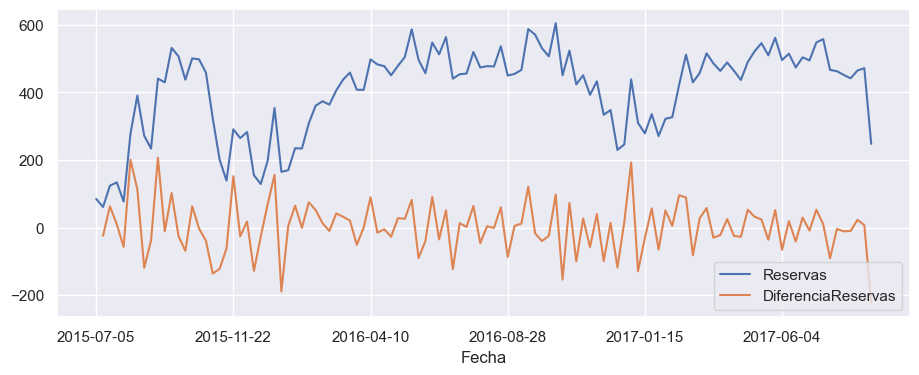

In [20]:
# Visualizar la serie temporal diferenciada
reservas_semanales[['Reservas', 'DiferenciaReservas']].plot()

<Axes: xlabel='Fecha'>

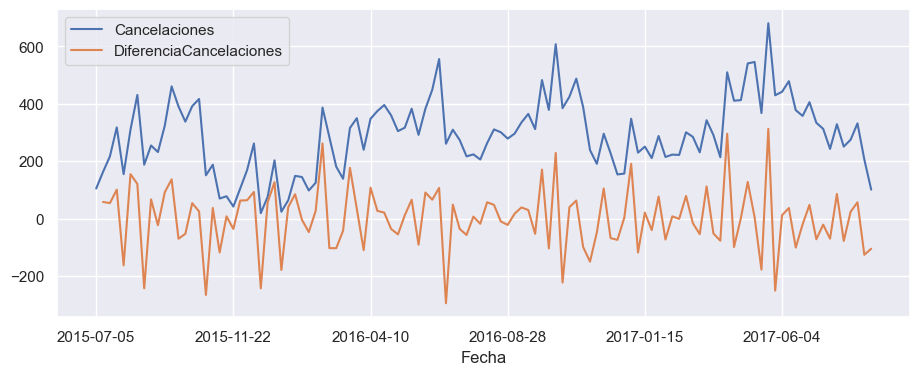

In [21]:
cancelaciones_semanales[['Cancelaciones', 'DiferenciaCancelaciones']].plot()

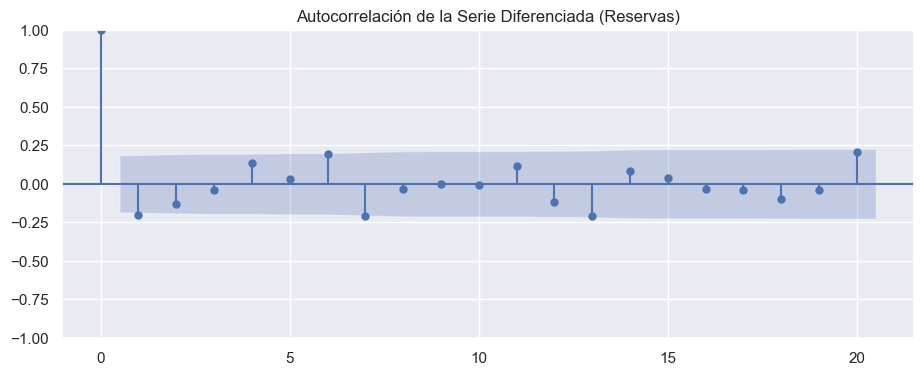

Estadística de prueba: -3.357374499371798
P-valor: 0.0125006915609683
Valores críticos: {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}


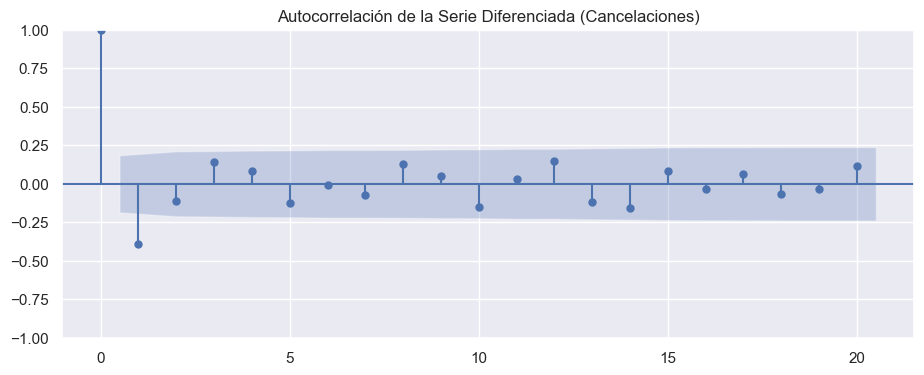

Estadística de prueba: -4.956988136931348
P-valor: 2.698020319469778e-05
Valores críticos: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}


In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Autocorrelación de la serie diferenciada
plot_acf(reservas_semanales['DiferenciaReservas'].dropna(), lags=20)
plt.title('Autocorrelación de la Serie Diferenciada (Reservas)')
plt.show()

# Prueba de Dickey-Fuller para estacionariedad (Reservas)
result_reservas_diff = adfuller(reservas_semanales['DiferenciaReservas'].dropna())
print('Estadística de prueba:', result_reservas_diff[0])
print('P-valor:', result_reservas_diff[1])
print('Valores críticos:', result_reservas_diff[4])

# Autocorrelación de la serie diferenciada
plot_acf(cancelaciones_semanales['DiferenciaCancelaciones'].dropna(), lags=20)
plt.title('Autocorrelación de la Serie Diferenciada (Cancelaciones)')
plt.show()

# Prueba de Dickey-Fuller para estacionariedad (Cancelaciones)
result_cancelaciones_diff = adfuller(cancelaciones_semanales['DiferenciaCancelaciones'].dropna())
print('Estadística de prueba:', result_cancelaciones_diff[0])
print('P-valor:', result_cancelaciones_diff[1])
print('Valores críticos:', result_cancelaciones_diff[4])

RESERVAS: 
La estadística de prueba es menor que los valores críticos, indicando que puedes rechazar la hipótesis nula de no estacionariedad.
El p-valor es 0.0125, que es menor que el nivel de significancia común del 5%, lo que refuerza la idea de que la serie es estacionaria.

CANCELACIONES: Es aún más baja que en el caso de reservas, indicando una fuerte evidencia en contra de la hipótesis nula de no estacionariedad.
El p-valor es extremadamente pequeño (2.6980203194696982e-05), lo que refuerza la conclusión de que la serie es estacionaria.

In [23]:
# Guardar las tablas de reservas y cancelaciones en archivos CSV
reservas_semanales.to_csv('reservas_semanales1.csv')
cancelaciones_semanales.to_csv('cancelaciones_semanales1.csv')